# Mushroom Classification

## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
style.use(['fivethirtyeight'])

# Importing the Dataset

In [3]:
shroom_DF = pd.read_csv('../input/mushroom-classification/mushrooms.csv')

# Data Overview

In [4]:
shroom_DF.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
shroom_DF.shape

(8124, 23)

This dataset has 8124 rows and 23 columns.

## Column Names

In [6]:
list(shroom_DF.columns)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

## Null Values

In [7]:
shroom_DF.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values in any of the columns.

# Exploratory Data Analysis

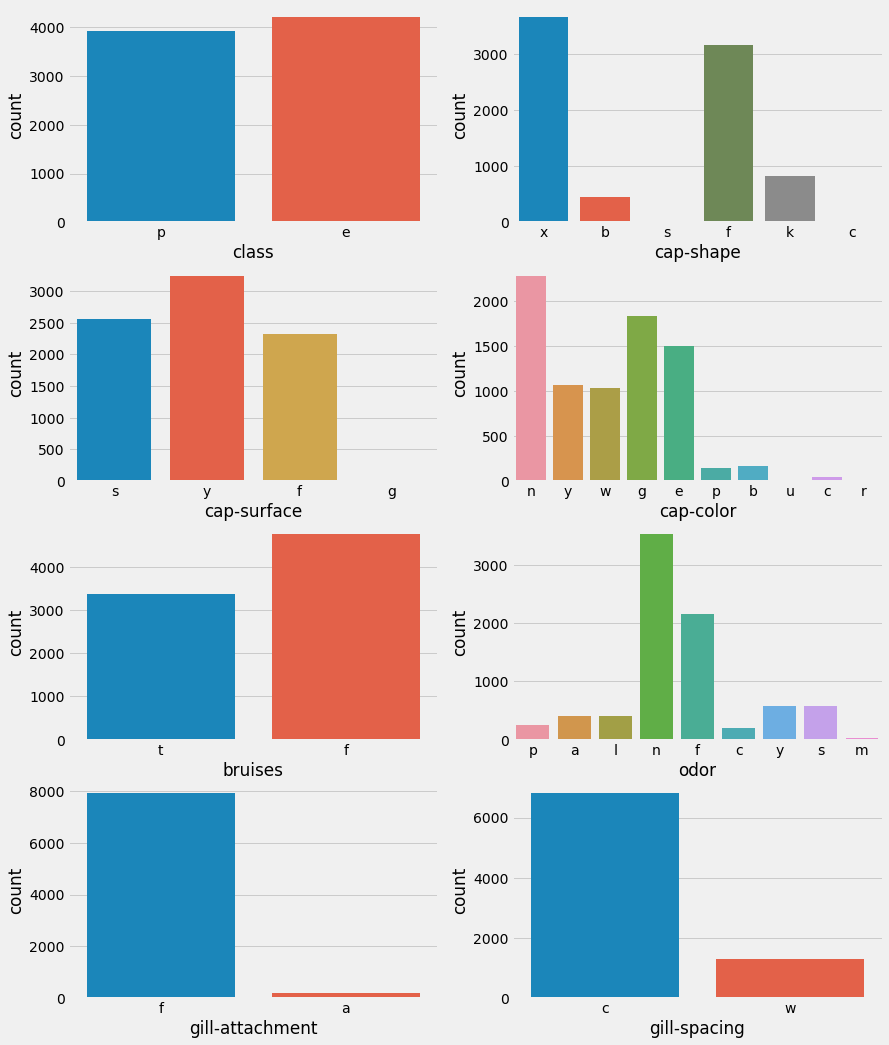

In [8]:
f, ax1 = plt.subplots(4, 2, figsize = (13,17))
sns.countplot(data = shroom_DF, x = "class", ax = ax1[0,0])
sns.countplot(data = shroom_DF, x = "cap-shape", ax = ax1[0,1])
sns.countplot(data = shroom_DF, x = "cap-surface", ax = ax1[1,0])
sns.countplot(data = shroom_DF, x = "cap-color", ax = ax1[1,1])
sns.countplot(data = shroom_DF, x = "bruises", ax = ax1[2,0])
sns.countplot(data = shroom_DF, x = "odor", ax = ax1[2,1])
sns.countplot(data = shroom_DF, x = "gill-attachment", ax = ax1[3,0])
sns.countplot(data = shroom_DF, x = "gill-spacing", ax = ax1[3,1])
plt.show()

In [9]:
shroom_DF['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

* **class**: (poisonous = p, edible = e) 51.8% of all the recorded mushrooms are edible.
* **cap-shape**: (bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s) Convex-shaped mushrooms are in the majority (45%). Only 4 out of the 8124 recorded mushrooms have a conical shaped cap.
* **cap-surface**: (fibrous = f, grooves = g, scaly = y, smooth = s) 39.93% of all mushrooms have a fibrous cap surface. Only 4 out of the 8124 recorded mushrooms have a groovy cap surface.
* **cap-color**: (brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y) 28.11% of all mushrooms have a brown coloured cap. Purple coloured and green coloured caps are the least in number (16 each).
* **bruises**: (bruises are present = t, no bruises = f) 58.44% of all mushrooms have no bruises.
* **odor**: (almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s) 43.43% of all mushrooms have no odour. 26.6% of all mushrooms have a foul smell. Only 0.4% of the mushrooms have a musty smell.
* **gill-attachment**: (attached = a, descending = d, free = f, notched = n) 97.41% of all mushrooms have free gills. These are not attached to the stalk. 
* **gill-spacing**: (close = c, crowded = w, distant = d) 83.85% of all mushrooms have closed-spaced gills.

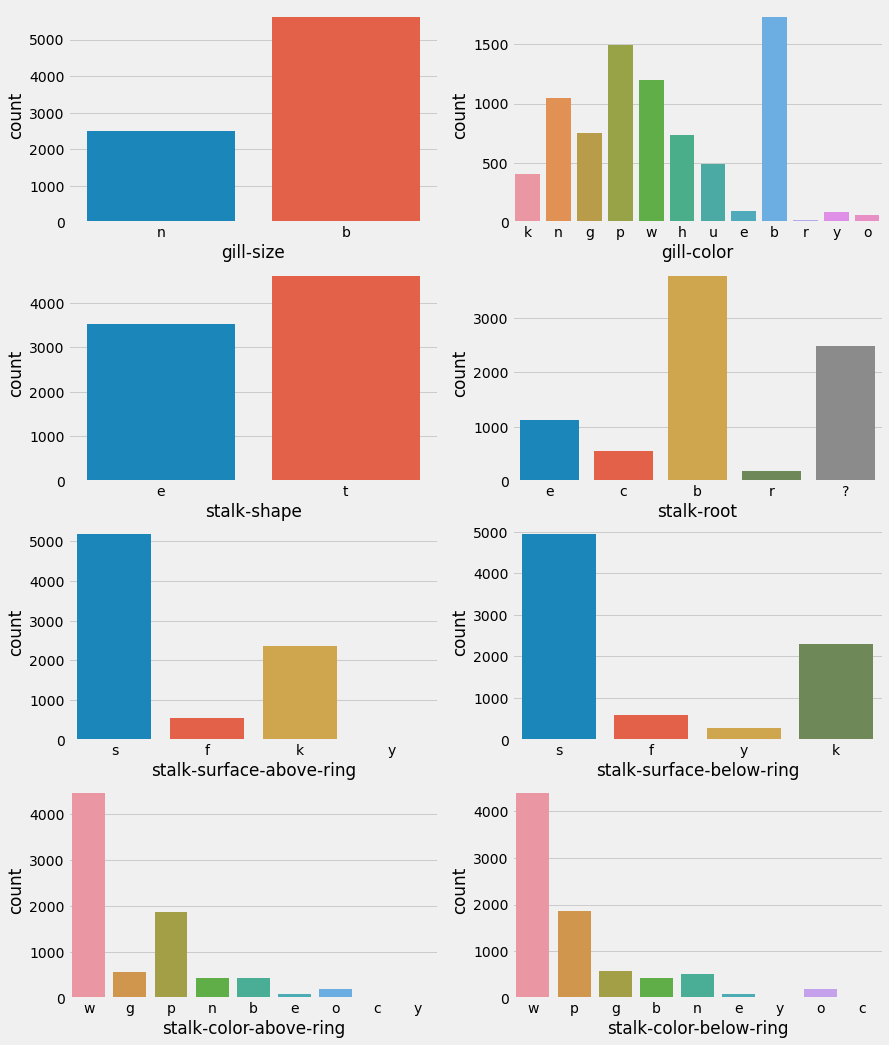

In [10]:
f, ax2 = plt.subplots(4, 2, figsize = (13,17))
sns.countplot(data = shroom_DF, x = "gill-size", ax = ax2[0,0])
sns.countplot(data = shroom_DF, x = "gill-color", ax = ax2[0,1])
sns.countplot(data = shroom_DF, x = "stalk-shape", ax = ax2[1,0])
sns.countplot(data = shroom_DF, x = "stalk-root", ax = ax2[1,1])
sns.countplot(data = shroom_DF, x = "stalk-surface-above-ring", ax = ax2[2,0])
sns.countplot(data = shroom_DF, x = "stalk-surface-below-ring", ax = ax2[2,1])
sns.countplot(data = shroom_DF, x = "stalk-color-above-ring", ax = ax2[3,0])
sns.countplot(data = shroom_DF, x = "stalk-color-below-ring", ax = ax2[3,1])
plt.show()

In [11]:
shroom_DF['stalk-color-below-ring'].value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64

* **gill-size**: (broad = b, narrow = n) 69.07% of all gill sizes are broad.
* **gill-color**: (black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y) 21.27% of all mushrooms have buff-coloured gills. Red-coloured gills are the least in number.
* **stalk-shape**: (enlarging = e, tapering = t) 56.72% of all mushrooms have tapering stalks. 
* **stalk-root**: (bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?) 46.48% of all mushrooms have a bulbous stalk root. Information about stalk roots for 30.53% of all mushrooms is missing.
* **stalk-surface-above-ring**: (fibrous = f ,scaly = y, silky = k, smooth = s) 63.71% of all mushrooms have a smooth stalk surface, above the ring. Only 0.3% of all mushrooms have scaly surfaces.
* **stalk-surface-below-ring**: (fibrous = f ,scaly = y, silky = k, smooth = s) 60.76% of all mushrooms have a smooth stalk surface, below the ring. Scaly surfaces are in the minority, constituting to only 3.5% of the whole dataset.
* **stalk-color-above-ring**: (brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y) 54.95% of all mushrooms have white-coloured stalks, above the ring. Only 8 out of 8124 have yellow-colored stalks. Red, cinnamon and yellow-coloured stalks form only 1.7% of the dataset.
* **stalk-color-below-ring**: (brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y) 53.96% of all mushrooms have white-coloured stalks, below the ring. Only 24 out of 8124 have yellow-colored stalks. Red, cinnamon and yellow-coloured stalks form only 1.9% of the dataset.

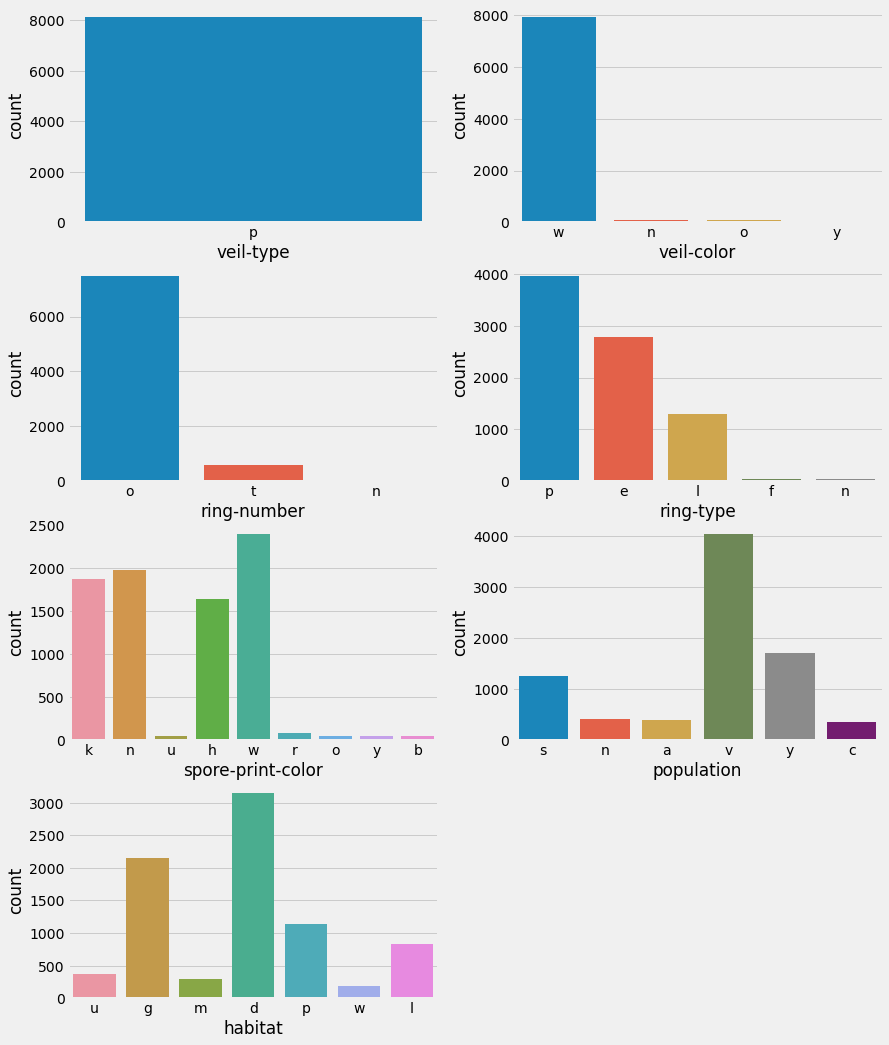

In [12]:
f, ax3 = plt.subplots(4, 2, figsize = (13,17))
sns.countplot(data = shroom_DF, x = "veil-type", ax = ax3[0,0])
sns.countplot(data = shroom_DF, x = "veil-color", ax = ax3[0,1])
sns.countplot(data = shroom_DF, x = "ring-number", ax = ax3[1,0])
sns.countplot(data = shroom_DF, x = "ring-type", ax = ax3[1,1])
sns.countplot(data = shroom_DF, x = "spore-print-color", ax = ax3[2,0])
sns.countplot(data = shroom_DF, x = "population", ax = ax3[2,1])
sns.countplot(data = shroom_DF, x = "habitat", ax = ax3[3,0])
f.delaxes(ax = ax3[3,1])
plt.show()

In [120]:
shroom_DF_1['stalk-root'].unique()

array([3, 2, 1, 4, 0])

* **veil-type**: (partial = p, universal = u) All the mushrooms in this dataset have partial veils. 
* **veil-color**: (brown = n, orange = o, white = w, yellow = y) Most of the mushrooms (97.54%) have white-coloured veils. Yellow-coloured veils are in the minority (0.098%).
* **ring-number**: (none = n, one = o, two = t) 92.17% of all mushrooms have 1 ring. 0.44% have no rings.
* **ring-type**: (cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z) 48.84% of all mushrooms have pendant rings. Flaring and no rings are in the minority, collectively forming only 1% of the whole dataset.
* **spore-print-color**: (black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y) The spore print is the powdery deposit obtained by allowing spores of a fungal fruit body to fall onto a surface underneath. It is an important diagnostic character in most handbooks for identifying mushrooms. 29.4% of all mushrooms have a white spore prints. Purple, yellow, buff and orange spore prints are in the minority.
* **population**: (abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y) 49.73% of all mushrooms are 'several' in terms of population. Clustered mushrooms are in the minority, forming only 4.19% of the whole dataset.
* **habitat**: (grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d) 38.75% of all mushrooms are located on woods. A small proportion (2.4%) of mushrooms are located on waste. 

# Label Encoder

In [14]:
lbe = LabelEncoder()
shroom_DF_1 = shroom_DF.copy()

In [15]:
for col in shroom_DF_1.columns:
    shroom_DF_1[col] = lbe.fit_transform(shroom_DF_1[col])

# Normalization

In [121]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [137]:
X = shroom_DF_1.drop(['class', 'veil-type', 'stalk-root'], axis = 1)
Y = shroom_DF_1['class']
X_norm = X.copy()

I will be removing the 'veil-type' column since all of the mushrooms have the same veil type. The 'stalk-root' column will also be eliminated since the information about the stalk root of a majority of mushrooms is missing.

In [138]:
for col in X_norm.columns:
    X_norm[col] = NormalizeData(X_norm[col])

# Train and Test Split

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.3, random_state = 42)

# Logistic Regression

In [140]:
shroom_log = LogisticRegression().fit(X_train, Y_train)

In [141]:
shroom_log_pred = shroom_log.predict(X_test)

In [142]:
print("Accuracy:\t", metrics.accuracy_score(Y_test, shroom_log_pred))

Accuracy:	 0.9511894995898277


# Naive Bayes Model

In [28]:
shroom_NB = CategoricalNB().fit(X_train, Y_train)

In [30]:
shroom_NB_pred = shroom_NB.predict(X_test)

In [31]:
print("Accuracy:\t", metrics.accuracy_score(Y_test, shroom_NB_pred))

Accuracy:	 0.8999179655455292


# Stochastic Gradient Descent Classifier Model

In [98]:
shroom_SGD = SGDClassifier(loss = 'hinge').fit(X_train, Y_train)

In [99]:
shroom_SGD_pred = shroom_SGD.predict(X_test)

In [100]:
print("Accuracy:\t", metrics.accuracy_score(Y_test, shroom_SGD_pred))

Accuracy:	 0.9622641509433962
